https://unimibfisicalaboratori.github.io/UnimibFisicaLabStatPythonWebBook/lectures/Lecture_12/EXERCISES.html

In [25]:
import numpy as np, matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL,ExtendedBinnedNLL,BinnedNLL
from scipy.stats import norm
import stats,files

In [2]:
data = stats.toy_Gauss(mean=2, sigma=1,N=10000)

In [3]:
files.write_file('dati2.txt',data.sample)

'success'

<h2>Data

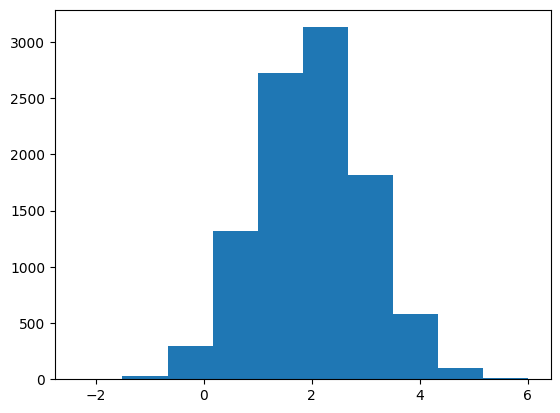

In [4]:
data = files.read_file('dati2.txt')
plt.hist(data)
plt.show()

<h2>Unbinned - TRADITIONAL

In [5]:
def loglikelihood_mean(dati,mean):
    return np.sum( np.log([norm.pdf(x,loc=mean, scale=1) for x in dati]))

In [6]:
def loglikelihood_sigma(dati,sigma):
    return np.sum( np.log([norm.pdf(x, loc=2 ,scale=sigma) for x in dati]))

In [7]:
t_mean = np.linspace(1,3,50)
like_mean = [loglikelihood_mean(data[:1000],i) for i in t_mean]

t_sigma = np.linspace(1e-4,2,50)
like_sigma = [loglikelihood_sigma(data[:1000],i) for i in t_sigma]

C:\Users\Yehan\AppData\Local\Temp\ipykernel_5472\3053274792.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum( np.log([norm.pdf(x, loc=2 ,scale=sigma) for x in dati]))


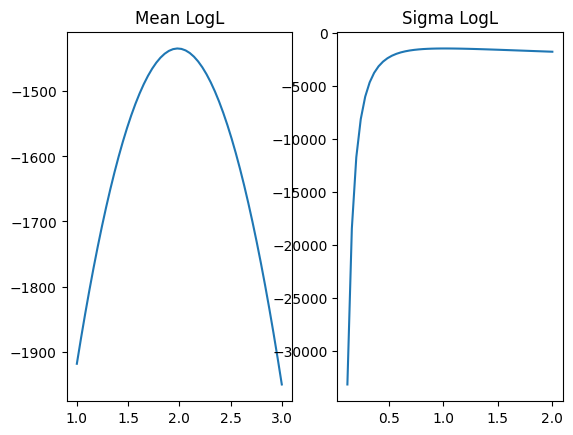

In [8]:
fig,ax = plt.subplots(1,2)

ax[0].plot(t_mean,like_mean)
ax[0].set_title("Mean LogL")

ax[1].plot(t_sigma,like_sigma)
ax[1].set_title("Sigma LogL")

plt.show()

In [9]:
def max_sez_aurea(sample,func,t,prec=.001):

    r = (-1+np.sqrt(5))/2  #golden ratio

    xmin = min(t)
    xmax = max(t)

    while abs(xmax-xmin) > prec:

        a = xmin +     r* abs(xmax-xmin)
        b = xmin + (1-r)* abs(xmax-xmin)
        
        if func(sample,b) < func(sample,a):
            xmin = b
        else: 
            xmax = a

    return xmin,func(sample,xmin)

In [10]:
t_mean = np.linspace(1,3,50)
x_mean,y_mean = max_sez_aurea(data[:1000],loglikelihood_mean,t_mean)

t_sigma = np.linspace(0,3,50)
x_sigma,y_sigma = max_sez_aurea(data[:1000],loglikelihood_sigma,t_sigma)

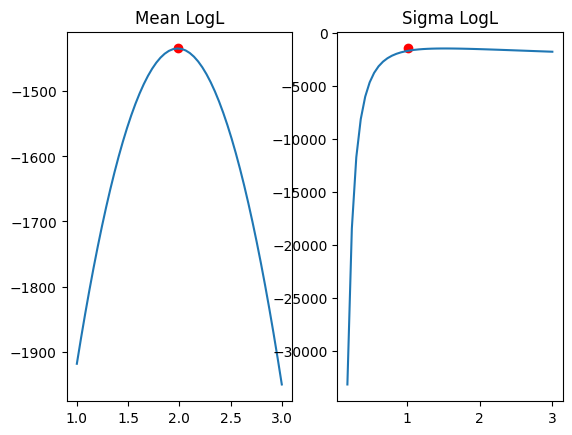

Mean: x=1.983566 y=-1434.311431
Sigma: x=1.015141 y=-1434.202423


In [11]:
fig,ax = plt.subplots(1,2)

ax[0].plot(t_mean,like_mean)
ax[0].set_title("Mean LogL")
ax[0].scatter(x_mean,y_mean, c='r')

ax[1].plot(t_sigma,like_sigma)
ax[1].set_title("Sigma LogL")
ax[1].scatter(x_sigma,y_sigma, c='r')

plt.show()
print("Mean: x=%f y=%f" % (x_mean,y_mean))
print("Sigma: x=%f y=%f" % (x_sigma,y_sigma))

<h2>Unbinned - MINUIT

In [12]:
def func(x,u,sigma):
    return norm.pdf(x,u,sigma)

In [26]:
cost = UnbinnedNLL(data,func)
my_minuit = Minuit(cost,u=0,sigma=1)
my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.851e+04                  │              Nfcn = 69               │
│ EDM = 3.25e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ u     │   1.999   │   0.010   │            │            │         │         │       │
│ 1 │ sigma │   1.007   │   0.007   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │        u    sigma │
├───────┼───────────────────┤
│     u │ 0.000101        0 │
│ sigma │        0 5.07e-05 │
└───────┴───────────────────┘

<h2>Binned

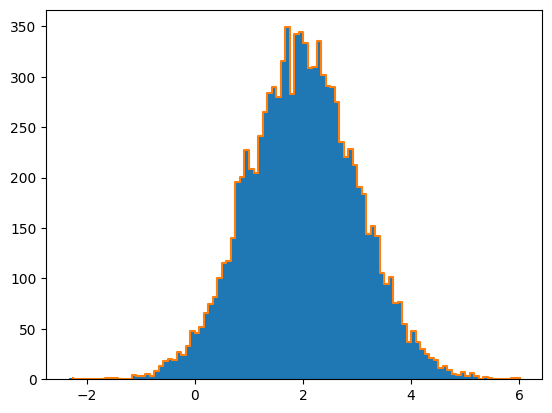

In [18]:
bin_data, bin_edges, patches = plt.hist(data,bins=100)
plt.step(bin_edges[1:], bin_data)
plt.show()

In [38]:
cost = ExtendedBinnedNLL(bin_data,bin_edges,func)
my_minuit = Minuit(cost,u=1,sigma=1)
my_minuit.limits['sigma'] = (0,None)
my_minuit.migrad()
# my_minuit.hesse()
display(my_minuit)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.09e+05 (χ²/ndof = 2133.1)│              Nfcn = 239              │
│ EDM = 0.000237 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ u     │  5.21760  │  0.00035  │            │            │         │         │       │
│ 1 │ sigma │   1.947   │   0.008   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │        u    sigma │
├───────┼───────────────────┤
│     u │ 1.25e-07  0.07e-6 │
│ sigma │  0.07e-6 6.33e-05 │
└───────┴───────────────────┘